In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
segments_df = pd.read_csv('../../data/Raw-GPS-data-Kandy-Buses/MAIN/OUTPUTS/merged_segments_10T.csv')

In [3]:
segments_df = segments_df.dropna()

In [4]:
features = segments_df[['speed_mean', 'speed_std', 'ele_X_speed_n', 'ele_X_speed_p', 'average_acceleration', 'average_deacceleration', 'std_acc_dacc']]

In [5]:
no_pca_components = 4
no_clusters = 3

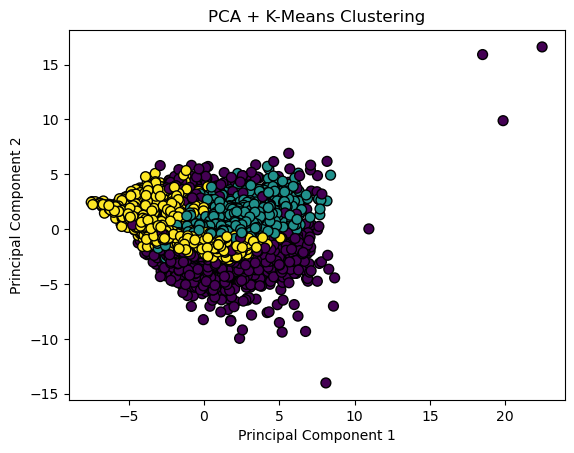

In [6]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X =  segments_df[['speed_mean', 'speed_std', 'ele_X_speed_n', 'ele_X_speed_p', 'average_acceleration', 'average_deacceleration', 'std_acc_dacc']]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=no_pca_components)  # Set the number of components as needed
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Fit Gaussian Mixture Model
n_components = no_clusters  # Number of clusters/components
gmm = GaussianMixture(n_components=n_components)
principal_df['cluster'] = gmm.fit_predict(principal_components)


# Plot the clusters in the reduced space
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['cluster'], cmap='viridis', marker='o', s=50, edgecolors='k')
plt.title('PCA + K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Assuming 'data' is your DataFrame
# data.to_csv('kmeans_clusters.csv', index=False)

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Calculate silhouette score
score_silhouette = silhouette_score(principal_df[['PC1', 'PC2', 'PC3', 'PC4']], principal_df['cluster'])

# calculate davies bouldin score
db_index = davies_bouldin_score(principal_df[['PC1', 'PC2', 'PC3', 'PC4']], principal_df['cluster'])

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(principal_df[['PC1', 'PC2', 'PC3', 'PC4']], principal_df['cluster'])

print("Silhouette Score: ", score_silhouette)
print("Davies Bouldin Index: ", db_index)
print("Calinski-Harabasz Index:", ch_index)


Silhouette Score:  0.17263289910241164
Davies Bouldin Index:  1.8498864460701772
Calinski-Harabasz Index: 17704.29119190741


In [8]:
eval_clustering = {
    "no_pca_components": no_pca_components,
    "no_of_clusters": no_clusters,
    "explained_variance_ratio": sum(pca.explained_variance_ratio_),
    "silhouette Score": score_silhouette,
    "Davies Bouldin Index": db_index,
    "Calinski-Harabasz Index": ch_index
}
eval_clustering

{'no_pca_components': 4,
 'no_of_clusters': 3,
 'explained_variance_ratio': 0.8982875692122954,
 'silhouette Score': 0.17263289910241164,
 'Davies Bouldin Index': 1.8498864460701772,
 'Calinski-Harabasz Index': 17704.29119190741}

In [37]:

original_features = np.random.rand(100, 5)  # Replace with your original features
pc1 = X_pca[:,0]
pc2 = X_pca[:,1]

# Combine data into a DataFrame
data = pd.DataFrame(np.column_stack([features, pc1, pc2]), columns=selected_features+ ['PC1', 'PC2'])

# Calculate correlations
correlations_pc1 = data.corr()['PC1'][:-2]  # Exclude PC1 and PC2 from the result
correlations_pc2 = data.corr()['PC2'][:-2]  # Exclude PC1 and PC2 from the result

# Combine correlations into a table
correlation_table = pd.DataFrame({
    'Original Feature': correlations_pc1.index,
    'Correlation with PC1': correlations_pc1.values,
    'Correlation with PC2': correlations_pc2.values
})

# Print or display the correlation table
print(correlation_table)


         Original Feature  Correlation with PC1  Correlation with PC2
0            std_acc_dacc              0.805354             -0.012272
1         speed_variation              0.787371             -0.492047
2             elevation_n              0.068030             -0.487125
3       ele_X_speed_acc_p              0.398725              0.748448
4       ele_X_speed_acc_n              0.417966              0.759547
5    average_acceleration              0.710455              0.344415
6  average_deacceleration             -0.769779              0.064156
7              stop_count              0.317866              0.245571
8           average_speed              0.653582             -0.331565
9               max_speed              0.810330             -0.298773


In [38]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = X_pca
y = labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


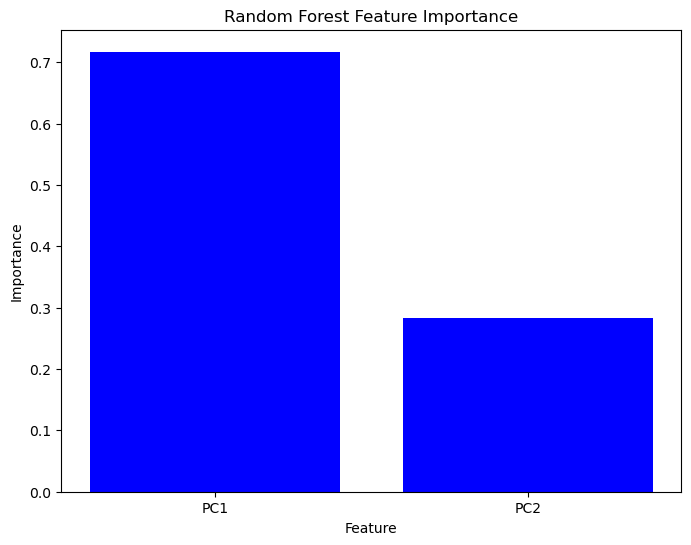

In [39]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar( ['PC1','PC2'], feature_importances, color='blue')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()